In [11]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../preprocessing/ready_for_training_automobile_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [3]:
sdf= df[['horsepower','price']]
sdf

,horsepower,price
0,111.0,13495
1,111.0,16500
2,154.0,16500
3,102.0,13950
4,115.0,17450
...,...,...
196,114.0,16845
197,160.0,19045
198,134.0,21485
199,106.0,22470


In [4]:
px.scatter(sdf,x='horsepower',y='price',color='price',size='price')

In [7]:
from sklearn.model_selection import validation_curve, train_test_split,learning_curve, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

In [8]:
X = df.drop(['price'], axis=1)
y = df['price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
reg = DecisionTreeRegressor()
train_scores,test_scores = validation_curve(
    reg, X, y, param_name='max_depth', param_range=max_depths, cv=10)
train_error,test_error = -train_scores,-test_scores

In [9]:
train_error.mean(axis=1), test_error.mean(axis=1)

(array([-0.66020183, -0.8695289 , -0.92063963, -0.95117604, -0.96890888,
        -0.9790014 , -0.98665662, -0.99150398, -0.99493038, -0.99744906]),
 array([ 0.7971742 , -0.26477717, -0.41152393, -0.48214153, -0.4367874 ,
        -0.4352997 , -0.41130692, -0.32202157, -0.01367159, -0.09071825]))

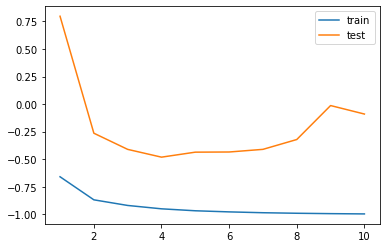

In [12]:
plt.plot(max_depths,train_error.mean(axis=1),label='train')
plt.plot(max_depths,test_error.mean(axis=1),label='test')
plt.legend()
plt.show()